In [1]:
import pandas
import pickle as pickle
import backtest
import numpy
import math

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

In [5]:
plot_data_value = pickle.load(open('temp_value/plot_data.pkl', 'rb'))
plot_data_momentum = pickle.load(open('temp_momentum/plot_data.pkl', 'rb'))

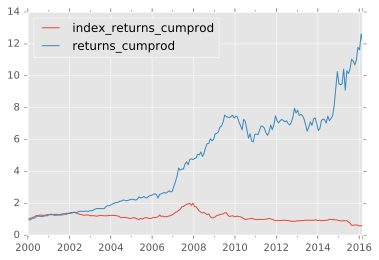

In [9]:
plot_data_value[['index_returns_cumprod', 'returns_cumprod']].plot()

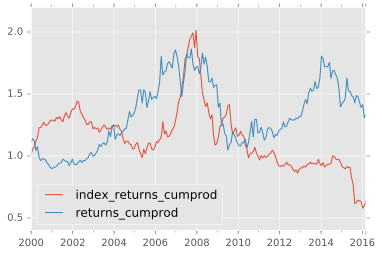

In [11]:
plot_data_momentum[['index_returns_cumprod', 'returns_cumprod']].plot()

In [18]:
plot_data_value

,returns,returns_cumprod,PI,index_returns,index_returns_cumprod,returns_std,returns_annualized,index_returns_std,index_returns_annualized,sharpe,index_sharpe
2000-01-03,0.979119,0.979119,1451.900,1.015698,1.015698,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,0.967204,0.947008,1631.524,1.038764,1.055071,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-28,1.058206,1.002130,1814.783,1.016995,1.073002,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-27,1.078670,1.080968,1889.534,1.044498,1.120748,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-24,0.984312,1.064009,1954.889,1.023339,1.146905,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-22,1.075314,1.144144,1941.130,1.070551,1.227821,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-19,1.048154,1.199240,2034.282,1.000981,1.229025,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-17,0.995412,1.193738,2105.201,1.017316,1.250307,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-14,0.991949,1.184128,2200.368,1.017257,1.271884,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-11,0.991781,1.174396,2089.886,0.980332,1.246868,NaN,NaN,NaN,NaN,NaN,NaN


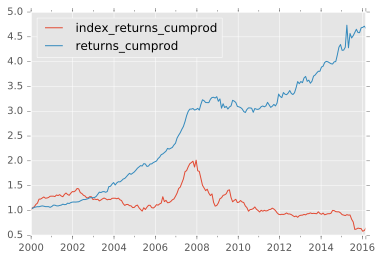

In [33]:
holding_period = 4

plot_data_combined = pandas.DataFrame()
plot_data_combined.index = plot_data_combined.index
plot_data_combined['returns'] = 0.5 * plot_data_value['returns'] + 0.5 * plot_data_momentum['returns']
plot_data_combined['returns_cumprod'] = plot_data_combined['returns'].cumprod()
plot_data_combined[['PI', 'index_returns', 'index_returns_cumprod']] = plot_data_value[['PI', 'index_returns', 'index_returns_cumprod']]
plot_data_combined['returns_std'] = plot_data_combined['returns_cumprod'].rolling(window=int(52/holding_period), min_periods=int(52/holding_period)).std()
plot_data_combined['returns_annualized'] = (plot_data_combined['returns_cumprod'] - plot_data_combined['returns_cumprod'].shift(int(52/holding_period))) / plot_data_combined['returns_cumprod'].shift(int(52/holding_period))
plot_data_combined[['index_returns_std', 'index_returns_annualized']] = plot_data_value[['index_returns_std', 'index_returns_annualized']]
plot_data_combined['sharpe'] = plot_data_combined['returns_annualized'] / plot_data_combined['returns_std']
plot_data_combined['index_sharpe'] = plot_data_value['index_sharpe']

pickle.dump(plot_data_combined, open('temp_combined/plot_data.pkl', 'wb'))

plot_data_combined.to_csv('results/combined_shanghai_plot_data.csv')
plot_data_combined[['index_returns_cumprod', 'returns_cumprod']].plot()

In [35]:
plot_data_value['returns'].corr(plot_data_momentum['returns'])

-0.56781402325127195

In [36]:
YEARS = [plot_data_combined.index.asof('%d-01-01' % year) for year in range(2001, 2017)]
returns_years = [plot_data_combined['returns_annualized'].loc[year] for year in YEARS]
sd_years = [plot_data_combined['returns_std'].loc[year] for year in YEARS]
sharpe_years = [plot_data_combined['sharpe'].loc[year] for year in YEARS]
index_returns_years = [plot_data_combined['index_returns_annualized'].loc[year] for year in YEARS]
index_sd_years = [plot_data_combined['index_returns_std'].loc[year] for year in YEARS]
index_sharpe_years = [plot_data_combined['index_sharpe'].loc[year] for year in YEARS]

summary = pandas.DataFrame({'years': list(range(2001, 2017)), 'factor_returns': returns_years, 'factor_sd': sd_years, 'factor_sharpe': sharpe_years, 'index_returns': index_returns_years, 'index_sd': index_sd_years, 'index_sharpe': index_sharpe_years})
summary = summary.set_index('years')
summary.to_csv('results/combined_shanghai_summary.csv')